In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm

from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Concatenate
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from keras import Input
from keras import optimizers
import random
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split



In [2]:
import pandas as pd
'''walks through the train directory, creates a dataframe with class and filepaths for all images present in the train directory'''

Dataset_Dir="C:\\Users\\Uma\\Anacondanew\\envs\\uma_tensor\\CNN COLOR Shallow\\\color_clean_balanced\\Type_data_training\\"
#"C:\\Users\\Uma\\Anacondanew\\envs\\tensorenviron\\thesis\\color_clean\\"
#C:\Users\Uma\Anacondanew\envs\tensorenviron\color data augmented
#C:\Users\Uma\Anacondanew\envs\tensorenviron\thesis\color data augmented
#C:\Users\Uma\Anacondanew\envs\tensorenviron\color_aug_clean
data = []
for category in sorted(os.listdir(Dataset_Dir)):
    for file in sorted(os.listdir(os.path.join(Dataset_Dir, category))):
        data.append((category, os.path.join(Dataset_Dir, category,  file)))

df = pd.DataFrame(data, columns=['class', 'file_path'])

In [3]:
len_df = len(df)
print(f"There are {len_df} images")

There are 17638 images


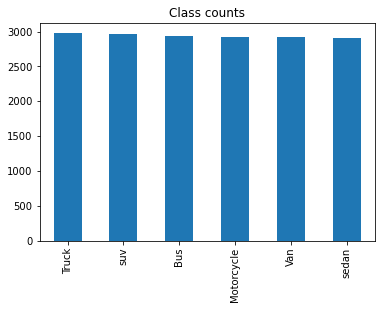

In [4]:
df['class'].value_counts().plot(kind='bar');
plt.title('Class counts');

In [5]:
CATEGORIES = ["Bus", "Truck","Motorcycle","Van","suv","sedan"]




IMG_SIZE = 100
training_data = []

#for training 
def create_training_data():
    for category in CATEGORIES:  

        path = os.path.join(Dataset_Dir,category)  # create path to categories
        class_num = CATEGORIES.index(category)  # get the classification  
        print (class_num)
        
        for img in tqdm(os.listdir(path)):  # iterate over each image per classes
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.COLOR_BGR2RGB)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass
create_training_data()            

  0%|          | 6/2943 [00:00<01:27, 33.70it/s]

0


  0%|          | 2/2974 [00:00<03:11, 15.52it/s]

1


  0%|          | 0/2928 [00:00<?, ?it/s]

2


  0%|          | 0/2927 [00:00<?, ?it/s]

3


  1%|          | 15/2962 [00:00<00:20, 146.23it/s]

4


  0%|          | 13/2904 [00:00<00:22, 125.84it/s]

5


100%|██████████| 2904/2904 [00:22<00:00, 128.68it/s]


In [6]:
import pandas as pd
df = pd.DataFrame(training_data, columns=['class', 'class_num'])

In [8]:
print(len(training_data))

17638


In [9]:
X_train = []
y_train = []

In [10]:
for features,label in training_data:
    X_train.append(features)
    y_train.append(label)
X_train = np.array(X_train).reshape(-1, IMG_SIZE, IMG_SIZE, 3)
y_train = np.array(y_train)



In [11]:
X_train = X_train/255.0  

X_train,X_test,y_train,y_test= train_test_split(X_train,y_train,test_size=0.3, random_state=1)

In [12]:
len(X_train)

12346

In [13]:
len(X_test)

5292

In [14]:
len(features)

100

# CNN with keras
Let's start by defining the topology of our CNN. We'll start  a single Conv2D layer, followed by a Dropout layer to prevent overfitting, which then gets flattened into a conventional deep neural network, with 512 neurons, a 50% dropout layer, and the final layer for six possible classification results.

In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten  
def createModel(input_shape=(100,100,3)):
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))#convolution layer
    model.add(Dropout(0.25))
 
    model.add(Flatten())#convert 2D to single dimension
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(6, activation='softmax')) #output
         
    return model

In [16]:
opt = tf.keras.optimizers.RMSprop(lr=0.0001, decay=1e-6)

model = createModel(X_train.shape[1:])

model.compile(loss='sparse_categorical_crossentropy',
              optimizer=opt,
              metrics=['acc'])


In [17]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 32)      896       
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 32)      0         
_________________________________________________________________
flatten (Flatten)            (None, 320000)            0         
_________________________________________________________________
dense (Dense)                (None, 512)               163840512 
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 3078      
Total params: 163,844,486
Trainable params: 163,844,486
Non-trainable params: 0
__________________________________________

In [19]:
history=model.fit(X_train, y_train, batch_size=64, epochs=30, validation_data=(X_test,y_test))

Epoch 1/30
193/193 [==============================] - 442s 2s/step - loss: 1.0453 - acc: 0.5974 - val_loss: 0.6744 - val_acc: 0.7536
Epoch 2/30
193/193 [==============================] - 420s 2s/step - loss: 0.6503 - acc: 0.7529 - val_loss: 0.5877 - val_acc: 0.7874
Epoch 3/30
193/193 [==============================] - 431s 2s/step - loss: 0.4823 - acc: 0.8363 - val_loss: 0.4847 - val_acc: 0.8322
Epoch 4/30
193/193 [==============================] - 442s 2s/step - loss: 0.3453 - acc: 0.8873 - val_loss: 0.4386 - val_acc: 0.8560
Epoch 5/30
193/193 [==============================] - 442s 2s/step - loss: 0.2603 - acc: 0.9208 - val_loss: 0.4403 - val_acc: 0.8445
Epoch 6/30
193/193 [==============================] - 430s 2s/step - loss: 0.1950 - acc: 0.9409 - val_loss: 0.4542 - val_acc: 0.8424
Epoch 7/30
193/193 [==============================] - 444s 2s/step - loss: 0.1443 - acc: 0.9605 - val_loss: 0.4071 - val_acc: 0.8702
Epoch 8/30
193/193 [==============================] - 448s 2s/step - 

In [20]:
scores = model.evaluate(X_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

166/166 [==============================] - 47s 285ms/step - loss: 0.6852 - acc: 0.8660
Test loss: 0.6851534843444824
Test accuracy: 0.8660241961479187


In [21]:
model.save('type_shallow_VGG_30.h5')

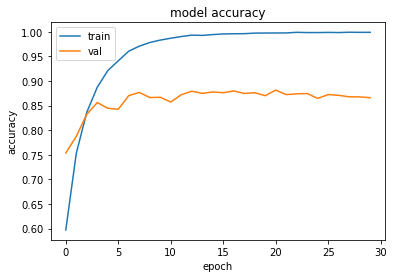

In [22]:
import keras
from matplotlib import pyplot as plt
#history = model1.fit(train_x, train_y,validation_split = 0.1, epochs=10, batch_size=32)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
# make a prediction
y_train_predict = model.predict_classes(X_train)


Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


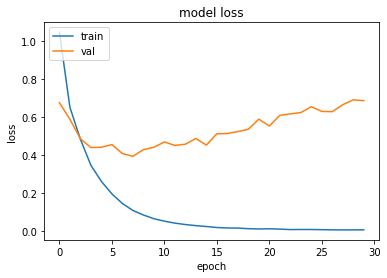

In [25]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [27]:
y_test_predict = model.predict_classes(X_test)

In [28]:
print(classification_report(y_test,y_test_predict))

              precision    recall  f1-score   support

           0       0.85      0.81      0.83       871
           1       0.77      0.75      0.76       923
           2       0.85      0.80      0.82       845
           3       0.81      0.94      0.87       878
           4       0.95      0.96      0.96       901
           5       0.97      0.93      0.95       874

    accuracy                           0.87      5292
   macro avg       0.87      0.87      0.87      5292
weighted avg       0.87      0.87      0.87      5292



(6.0, 0.0)

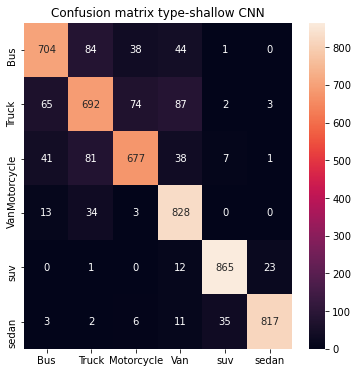

In [29]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
cm = confusion_matrix(y_test,y_test_predict)
plt.figure(figsize=(6, 6))


plt.title('Confusion matrix type-shallow CNN')


ax=sns.heatmap(cm, annot=True, fmt="d")
ax.xaxis.set_ticklabels(["Bus", "Truck","Motorcycle","Van","suv","sedan"]); ax.yaxis.set_ticklabels(["Bus", "Truck","Motorcycle","Van","suv","sedan"]);
ax.set_ylim(sorted(ax.get_xlim(), reverse=True))